In [75]:
!pip install keras

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
churn_data = pd.read_csv("Churn_Modelling.csv")
churn_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [78]:
churn_data.shape

(10000, 14)

In [79]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [80]:
churn_data.duplicated().sum()

np.int64(0)

In [81]:
churn_data['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [82]:
churn_data['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [83]:
churn_data['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [84]:
churn_data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [85]:
churn_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# One Hot Encoding:
Apply on 2 column Geography or Gender

In [86]:
churn_data = pd.get_dummies(churn_data,columns=['Geography','Gender'],drop_first=True)

# Scaling:

In [87]:
from sklearn.model_selection import train_test_split
y_data = churn_data['Exited'] # Extract the target variable before dropping it
X_data = churn_data.drop(['Exited'], axis=1) # Now drop 'Exited' from X_data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [88]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,686,32,6,0.00,2,1,1,179093.26,False,False,True
1561,632,42,4,119624.60,2,1,1,195978.86,True,False,True
1670,559,24,3,114739.92,1,1,0,85891.02,False,True,True
6087,561,27,9,135637.00,1,1,0,153080.40,False,False,False
6669,517,56,9,142147.32,1,0,0,39488.04,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,False,False,True
5191,682,58,1,0.00,1,1,1,706.50,False,False,False
5390,735,38,1,0.00,3,0,0,92220.12,False,False,False
860,667,43,8,190227.46,1,1,0,97508.04,False,False,True


In [89]:
from sklearn.preprocessing import StandardScaler
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [90]:
X_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

# Apply Keras:

In [94]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

## Architecture Of Neural Network:

In [123]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim = 11))  # input layer is 11 ans hiden layer1 has 11 node
model.add(Dense(11,activation='relu')) #hidden layer2 and num of node is 11
model.add(Dense(1,activation='sigmoid'))  # output layer is 1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [124]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

## Loss Function Use "Binary Cross Entropy"
## Optimizer Use "Adam"

In [125]:
model.compile(loss = 'binary_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [133]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8728 - loss: 0.3166 - val_accuracy: 0.8581 - val_loss: 0.3486
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8635 - loss: 0.3290 - val_accuracy: 0.8581 - val_loss: 0.3495
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8667 - loss: 0.3259 - val_accuracy: 0.8600 - val_loss: 0.3480
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8697 - loss: 0.3242 - val_accuracy: 0.8606 - val_loss: 0.3496
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8705 - loss: 0.3140 - val_accuracy: 0.8581 - val_loss: 0.3471
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8672 - loss: 0.3248 - val_accuracy: 0.8575 - val_loss: 0.3478
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8708 - loss: 0.3176 - val_accuracy: 0.8544 - val_loss: 0.3488
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8621 - loss: 0.3244 - val_accu

In [127]:
model.layers[0].get_weights()

[array([[ 0.42935106,  0.08873678,  0.05372292,  0.02472387,  0.33978292,
          0.08610857,  0.21884772, -0.29837275,  0.12107106,  0.17827287,
          0.2789285 ],
        [ 0.7397661 , -0.06980011,  0.31293136, -0.8001566 , -0.45234674,
          0.06091212, -0.47340086,  0.00892461, -0.66662323, -0.87875783,
          1.2465409 ],
        [ 0.05889727,  0.20802961, -0.30193383,  0.07742935, -0.30428374,
         -0.08806124,  0.02678016, -0.4055296 , -0.18354374, -0.38166854,
         -0.86339664],
        [ 0.01886429,  0.56531596,  0.22862321,  0.16815633, -0.195281  ,
         -0.22328928, -0.4501038 , -0.18594201, -0.10495189,  0.17247175,
         -0.05090038],
        [ 0.16296123,  0.91442126,  1.0432868 ,  0.07774195,  0.22079827,
         -1.2979192 ,  0.11451314,  0.08913819, -0.13152096, -0.4355561 ,
          0.42221418],
        [ 0.23687701, -0.20096874,  0.17250265, -0.1727735 , -0.16410016,
          0.01820143, -0.20432809,  0.52448237, -0.09198753, -0.1710846

In [128]:
model.layers[1].get_weights()

[array([[-0.1803526 ,  0.18744525,  0.34901294, -0.3700136 , -0.558729  ,
          0.48755008, -0.35162956,  0.46907926,  0.32485655,  0.34491467,
         -0.21355806],
        [ 0.14907461, -0.01791343, -0.4048842 , -0.31904215,  0.8491733 ,
          0.7623112 ,  0.26186973, -0.20467174, -0.1852164 , -0.21354984,
         -0.5094137 ],
        [ 0.49425605,  0.97124845,  0.01029912,  0.05158983,  0.5150652 ,
          0.348766  , -0.7984842 , -0.02798984,  0.31767657, -0.46750912,
          0.07374856],
        [ 0.4422817 , -0.32935   ,  0.63740915,  0.05825336, -0.15305312,
          0.3991609 , -0.66584927, -0.10065313,  0.4680989 ,  0.34772763,
          0.28237328],
        [ 0.52079123, -0.10865973,  0.31686667, -0.01840192,  0.07186435,
          0.29731476,  0.59070283,  0.25798264, -0.2426066 , -0.399385  ,
          0.2988993 ],
        [-0.07438689,  0.69938177, -0.07544079,  0.08216345,  0.4241794 ,
          0.40989918,  0.16409293, -0.98049575, -0.26033965, -0.5063292

In [129]:
y_log=model.predict(X_test_scaled)#ya humay sary X_test cel ky ly prediction nikl ky dy ga

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


model ki value ko 0 or 1 py lnay ky ly humay aik thearshold set karna pdhy ga jo humary value ko point ki bajya 0 or 1 may ly kya ay

In [130]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [131]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [132]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8605

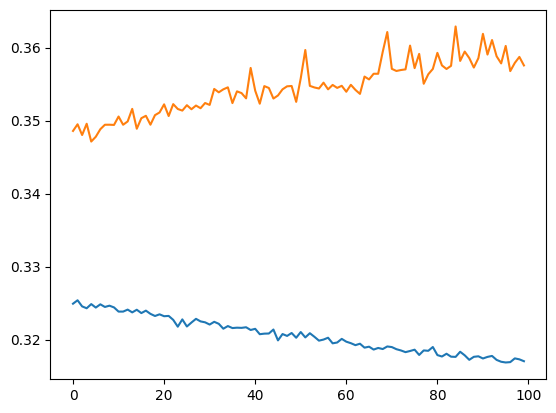

In [134]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

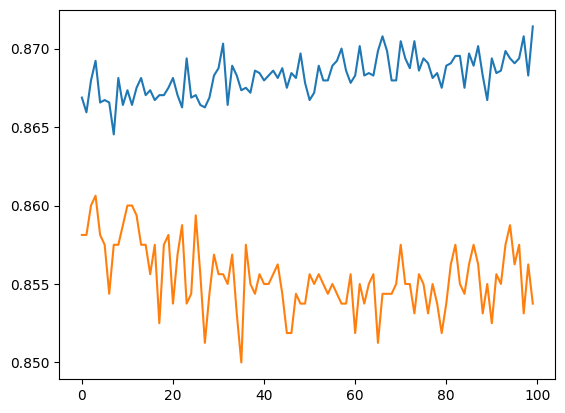

In [135]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])